In [1]:
import pandas as pd
import numpy as np
import seaborn as sns;
import matplotlib.pyplot as plt

data_path = "../data/heart_cleveland_upload.csv"

#### Загрузка датасета

In [2]:
df = pd.read_csv(data_path)

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


#### краткая информация о датасете

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


В датасете Ghтвуют категориальные данные, для некоторых столбцов целесообразно применить one hot encoding

#### Найдём пропуски в датасете

In [6]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Датасет без пропусков

#### Оценим корреляцию в датасете

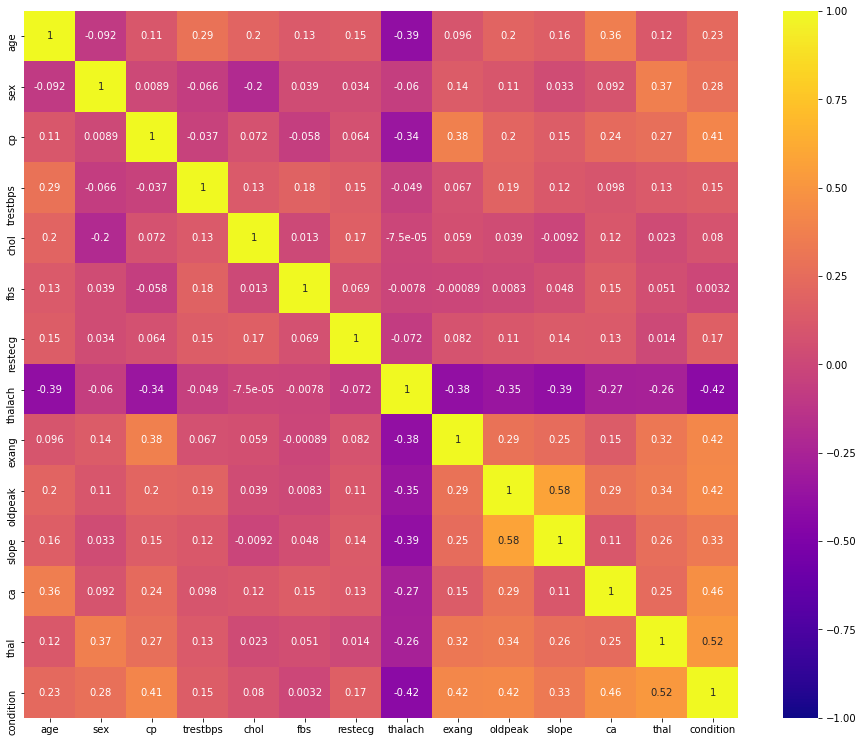

In [7]:
corr = df.corr()

plt.figure(figsize=(16, 13))
sns.heatmap(corr, annot=True, cmap="plasma", vmin=-1.0, vmax=1.0)
plt.show()

Наибольшая корреляция у заболевания с cp (chest pain type), exang (exercise induced angina), oldpeak(ST depression induced by exercise relative to rest), slope (the slope of the peak exercise ST segment), ca (number of major vessels (0-3) colored by flourosopy), thal(0 = normal; 1 = fixed defect; 2 = reversable defect and the label), thalach (maximum heart rate achieved)

#### Оценим влияние некоторых из параметров

<Figure size 864x720 with 0 Axes>

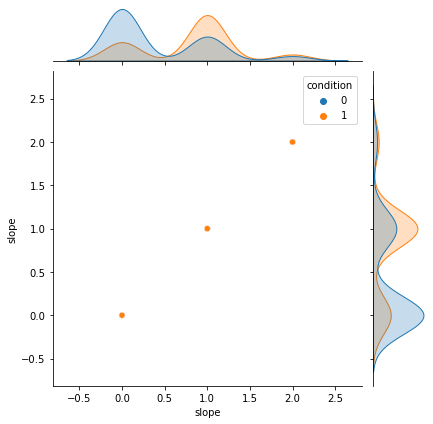

In [13]:
plt.figure(figsize=(12,10))
sns.jointplot(data=df, x='slope',y='slope', hue='condition')
plt.show()

<Figure size 864x720 with 0 Axes>

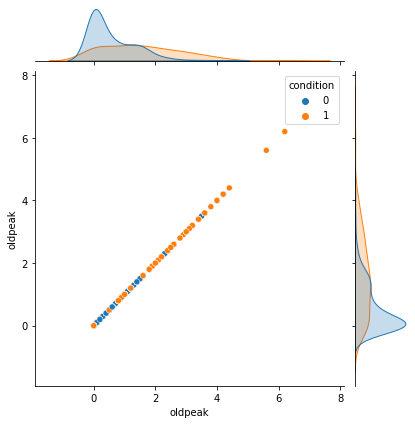

In [8]:
plt.figure(figsize=(12,10))
sns.jointplot(data=df, x='oldpeak',y='oldpeak', hue='condition')
plt.show()

Налицие заболевания заметно чаще при oldpeak > 2

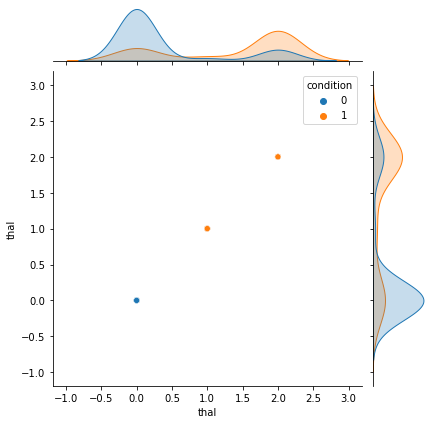

In [9]:
sns.jointplot(data=df, x='thal',y='thal', hue='condition')
plt.show()

При thal = 2 (reversable defect and the label) заболевание более вероятно

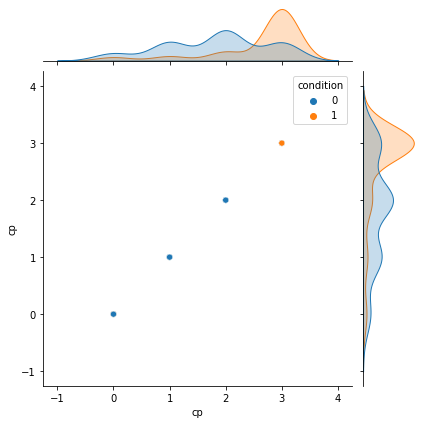

In [10]:
sns.jointplot(data=df, x='cp',y='cp', hue='condition')
plt.show()

При cp = 3 (asymptomatic pain) вероятность заболевания максимальна

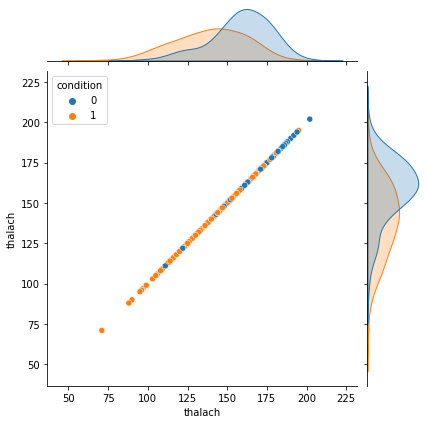

In [11]:
sns.jointplot(data=df, x='thalach',y='thalach', hue='condition')
plt.show()

При  thalach > 160(Гц) вероятность заболевания становится меньше 50% 

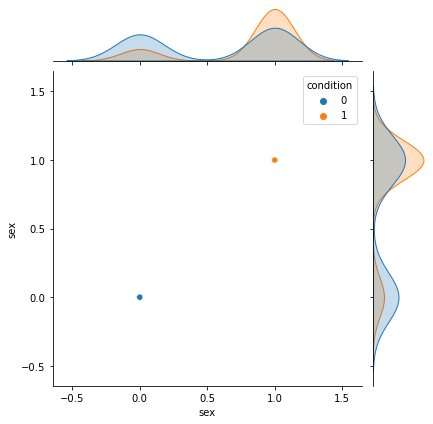

In [12]:
sns.jointplot(data=df, x='sex',y='sex', hue='condition')
plt.show()

Для мужчин заболевание более вероятно